In [1]:
#first we need to install the required modules
!pip install -U segmentation_models dicom2nifti nilearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 88.3 MB/s eta 0:00:00


In [2]:
#to train the models we first need the ACDC dataset, and the prep.py script which does the preprocessing of the images and the data augmentation
!gdown https://drive.google.com/uc?id=1qAUJtiPZfT3jm4V4qg-VRVucpZva-Qj_ -O /content/ACDC.zip && unzip -q /content/ACDC.zip -d /content
!gdown https://drive.google.com/uc?id=17qlna9cM-kI4B7XohwSHwPoD5jx0-Qlx -O /content/prep.py

Downloading...
From: https://drive.google.com/uc?id=1qAUJtiPZfT3jm4V4qg-VRVucpZva-Qj_
To: /content/ACDC.zip
100% 2.45G/2.45G [00:28<00:00, 85.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=17qlna9cM-kI4B7XohwSHwPoD5jx0-Qlx
To: /content/prep.py
100% 15.1k/15.1k [00:00<00:00, 42.6MB/s]


In [3]:
#we also download the 3 scripts to train the 3 separate models
!gdown https://drive.google.com/uc?id=1IdoIA_YLQ_Wmmjlt23XpvUNBKkQs4OJg -O /content/unet_train.py
!gdown https://drive.google.com/uc?id=1JGF5ySYY9qbPTwVJnX5d126d5FIjMmeQ -O /content/linknet_train.py
!gdown https://drive.google.com/uc?id=1G59hS3z1hLUlTGpabZrbtsRFF71eKdm1 -O /content/fpn_train.py

Downloading...
From: https://drive.google.com/uc?id=1IdoIA_YLQ_Wmmjlt23XpvUNBKkQs4OJg
To: /content/unet_train.py
100% 7.90k/7.90k [00:00<00:00, 31.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JGF5ySYY9qbPTwVJnX5d126d5FIjMmeQ
To: /content/linknet_train.py
100% 7.91k/7.91k [00:00<00:00, 31.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1G59hS3z1hLUlTGpabZrbtsRFF71eKdm1
To: /content/fpn_train.py
100% 7.89k/7.89k [00:00<00:00, 21.5MB/s]


In [4]:
#before training we need to run the prep.py to preprocess the raw data
%run prep.py

 - - - preprocessing started - - - 
x_train:	 shape:  (1000, 256, 256, 3) 	min:  0.0 max:  1.0
x_train_aug:	 shape:  (625, 256, 256, 3) 	min:  0.0 max:  1.0
y_train:	 shape:  (1000, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
y_train_aug:	 shape:  (625, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
x_test:		 shape:  (500, 256, 256, 3) 	min:  0.0 max:  1.0
x_test_aug:	 shape:  (250, 256, 256, 3) 	min:  0.0 max:  1.0
y_test:		 shape:  (500, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
y_test_aug:	 shape:  (250, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
 - - - preprocessing finished - - - 


Starting training with batch size:  8 , learning rate:  0.0001 , and epochs:  30
x_train: 	 (1625, 256, 256, 3) 0.0 1.0 	 [[0.4393477 0.4393477 0.4393477]]
y_train: 	 (1625, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
x_test: 	 (750, 256, 256, 3) 0.0 1.0 	 [[0.6211397 0.6211397 0.6211397]]
y_test: 	 (750, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
(1365, 256, 256, 3) (260, 256, 256, 3) (750, 256, 256, 3)
(1365, 256, 256, 1) (260, 256, 256, 1) (750, 256, 256, 1)
(1365, 256, 256, 4) (260, 256, 256, 4) (750, 256, 256, 4)
y_train_cat: 	 (1365, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
y_val_cat: 	 (260, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
y_test_cat: 	 (750, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
85521592/85521592 [==============================] - 0s 0us/step
Epoch 1/30
170/170 [==============================] - 69s 177ms/step - loss: 0.9694 - iou_score: 0.3201 - f1-score: 0.4241 - val_loss: 0.9719 - val_iou_score: 0.049

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved unet_self-trained.h5 to folder.
Saved unet_training_history.csv to folder.


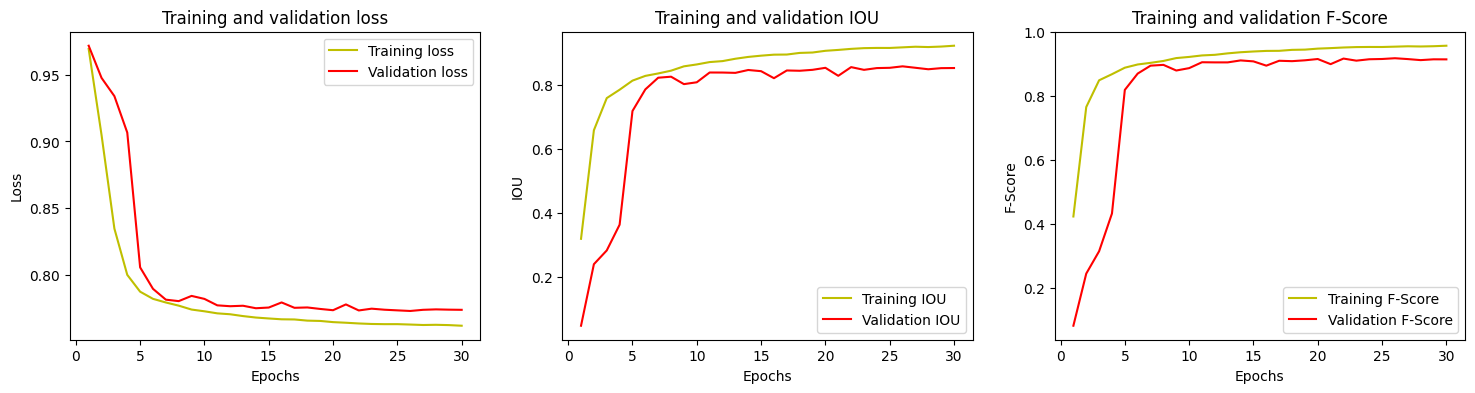

Saved unet_training_metrics_plot.png to folder.


<Figure size 640x480 with 0 Axes>

In [ ]:
#now we can train the models with input arguments batch_size, learning_rate, and epochs
#if this fails, all you need to do is to click on /usr/local/lib/python3.10/dist-packages/efficientnet/__init__.py in the error message
#and delete "generic_utils" from "keras.utils.generic_utils.get_custom_objects().update(custom_objects)"
#it should be: "keras.utils.get_custom_objects().update(custom_objects)"
#then restart the runtime, and rerun this cell
%run unet_train.py --epochs 30

Segmentation Models: using `tf.keras` framework.
Starting training with batch size:  8 , learning rate:  0.0001 , and epochs:  30
x_train: 	 (1625, 256, 256, 3) 0.0 1.0 	 [[0.4393477 0.4393477 0.4393477]]
y_train: 	 (1625, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
x_test: 	 (750, 256, 256, 3) 0.0 1.0 	 [[0.6211397 0.6211397 0.6211397]]
y_test: 	 (750, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
(1365, 256, 256, 3) (260, 256, 256, 3) (750, 256, 256, 3)
(1365, 256, 256, 1) (260, 256, 256, 1) (750, 256, 256, 1)
(1365, 256, 256, 4) (260, 256, 256, 4) (750, 256, 256, 4)
y_train_cat: 	 (1365, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
y_val_cat: 	 (260, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
y_test_cat: 	 (750, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
85521592/85521592 [==============================] - 1s 0us/step
Epoch 1/30
170/170 [==============================] - 66s 158ms/step - loss: 0.9919 - iou_score: 0.2050 - f1-score:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved linknet_self-trained.h5 to folder.
Saved linknet_training_history.csv to folder.


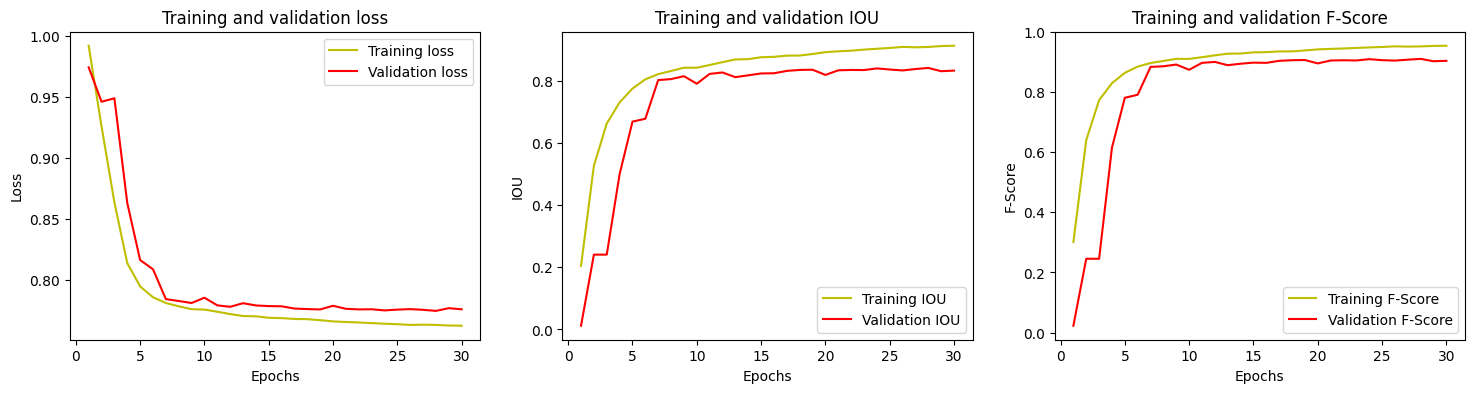

<Figure size 640x480 with 0 Axes>

In [5]:
#we train the second model - you might need to restart the runtime to free up memory
%run linknet_train.py --epochs 30

Segmentation Models: using `keras` framework.
Starting training with batch size:  8 , learning rate:  0.0001 , and epochs:  20
x_train: 	 (1625, 256, 256, 3) 0.0 1.0 	 [[0.4393477 0.4393477 0.4393477]]
y_train: 	 (1625, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
x_test: 	 (750, 256, 256, 3) 0.0 1.0 	 [[0.6211397 0.6211397 0.6211397]]
y_test: 	 (750, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
(1365, 256, 256, 3) (260, 256, 256, 3) (750, 256, 256, 3)
(1365, 256, 256, 1) (260, 256, 256, 1) (750, 256, 256, 1)
(1365, 256, 256, 4) (260, 256, 256, 4) (750, 256, 256, 4)
y_train_cat: 	 (1365, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
y_val_cat: 	 (260, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
y_test_cat: 	 (750, 256, 256, 4) 0.0 1.0 [[0. 0. 0. 1.]] 	labels:  [0. 1.]
Epoch 1/20
170/170 [==============================] - 104s 362ms/step - loss: 0.8475 - iou_score: 0.5808 - f1-score: 0.6862 - val_loss: 0.9499 - val_iou_score: 0.2411 - val_f1-score: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved fpn_self-trained.h5 to folder.
Saved fpn_training_history.csv to folder.


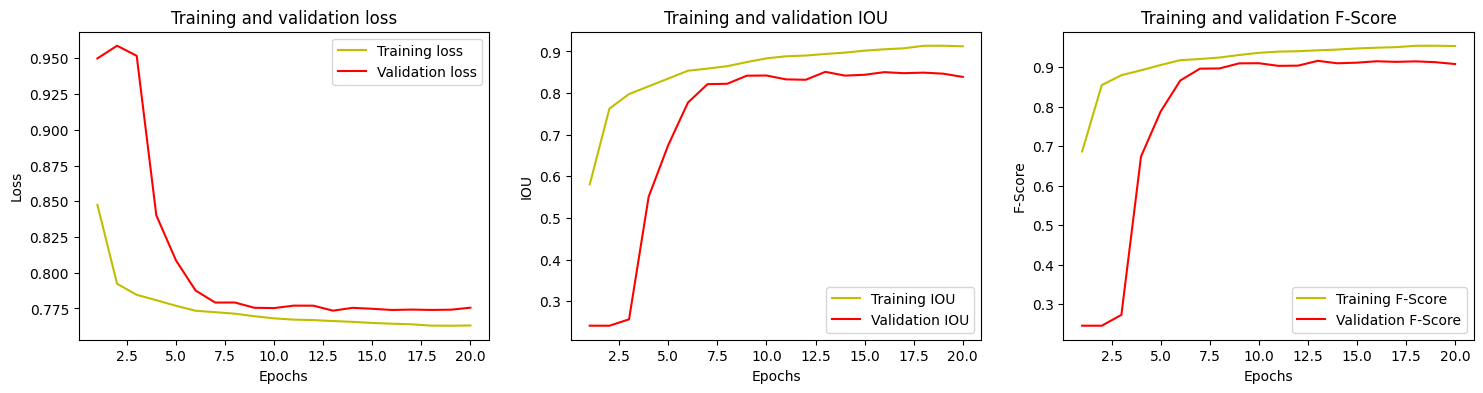

<Figure size 640x480 with 0 Axes>

In [1]:
#we train the third model - you might need to restart the runtime to free up memory
%run fpn_train.py --epochs 20

In [7]:
#we can now download the models we want to keep
from google.colab import files
files.download("/content/unet_self-trained.h5")

In [8]:
from google.colab import files
files.download("/content/linknet_self-trained.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files
files.download("/content/fpn_self-trained.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>